In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
df.	Gender=le.fit_transform(df['Gender'])

In [8]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [9]:
x=df.drop('Gender',axis=1)

In [10]:
y=df['Gender']

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

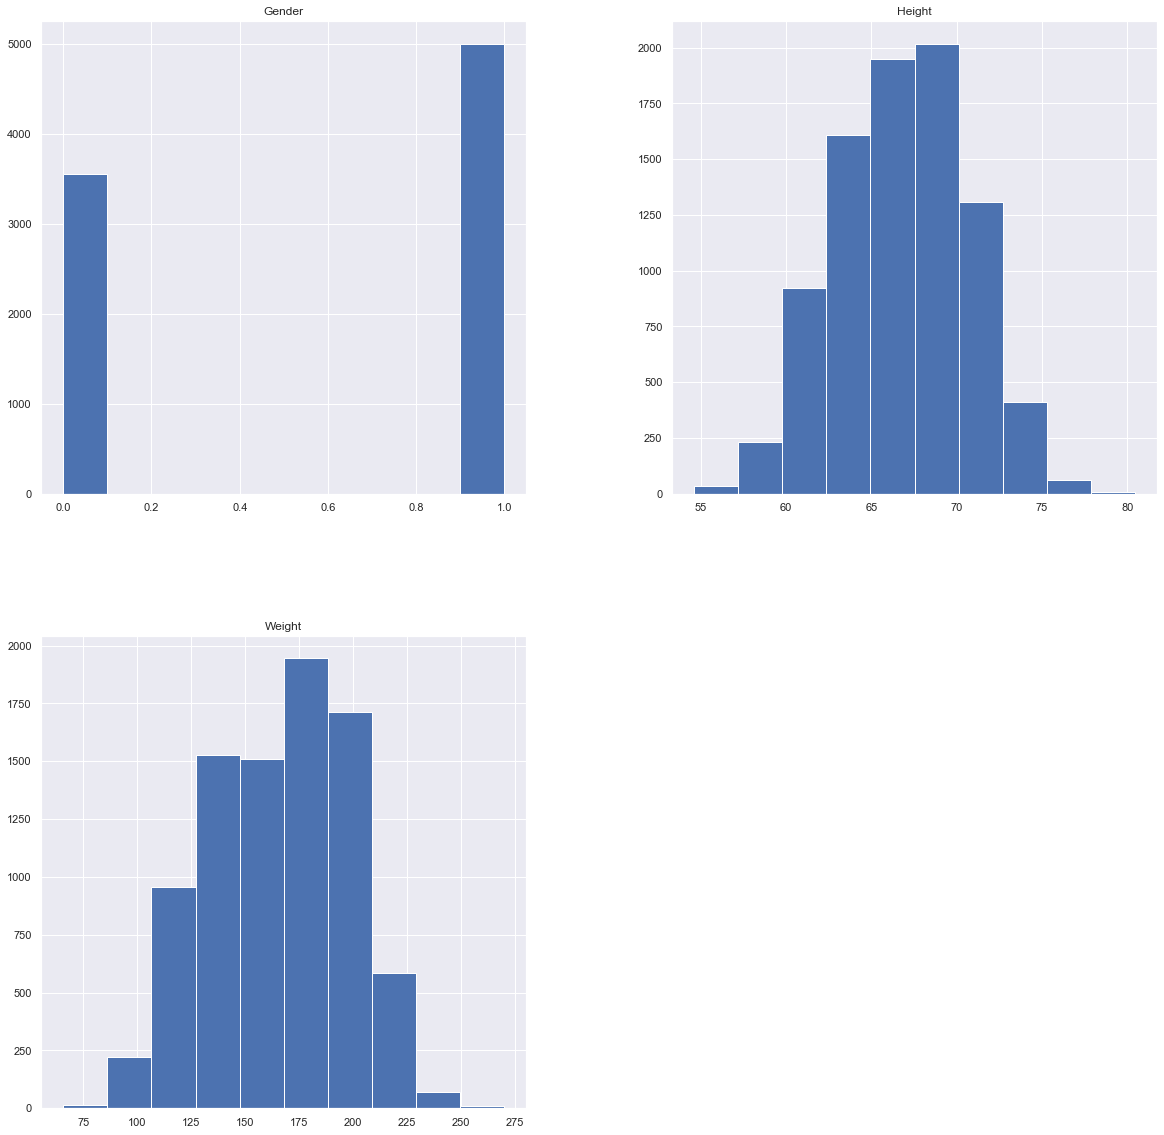

In [12]:
p = df.hist(figsize = (20,20))

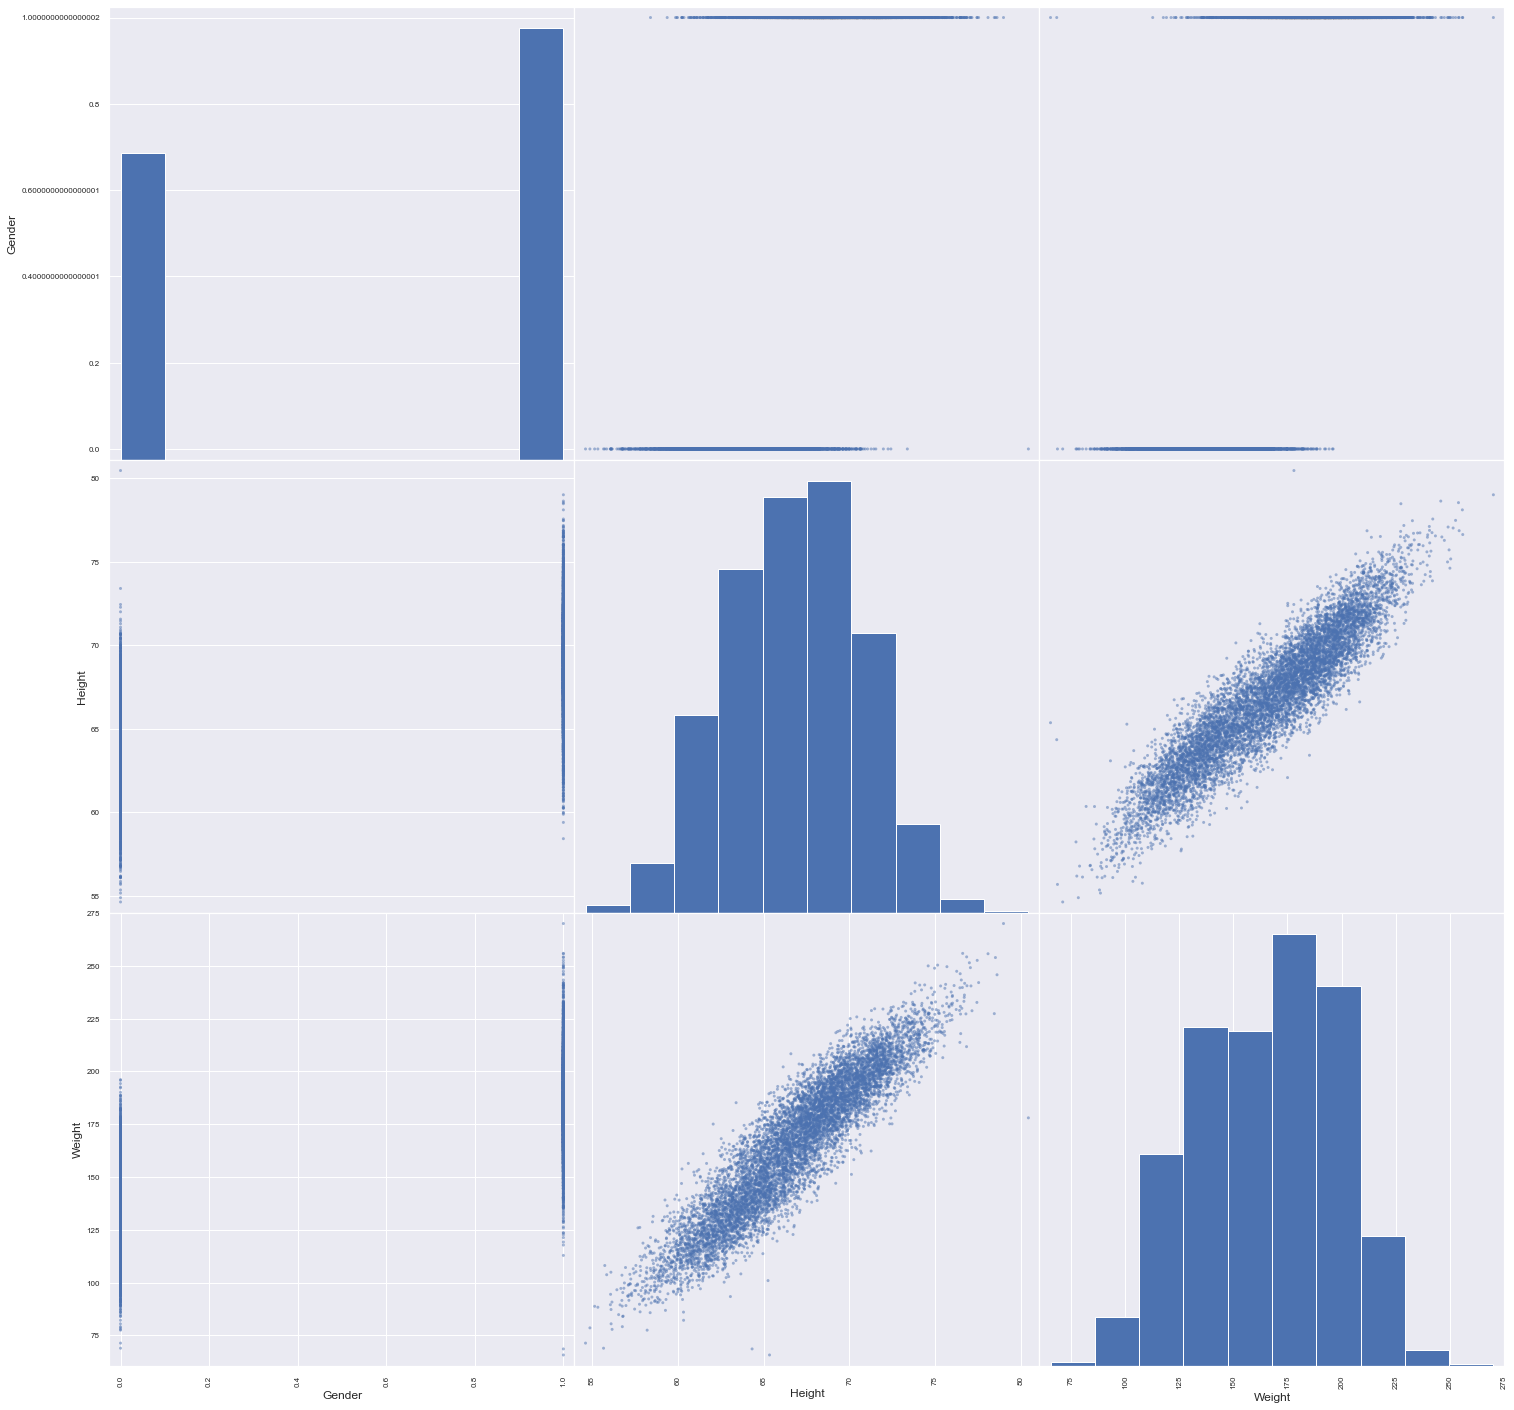

In [15]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [23]:
print(train_scores)
print(test_scores)

[1.0, 0.9377087508350034, 0.9390447561790247, 0.9323647294589178, 0.9333667334669339, 0.926686706746827, 0.9290247160988644, 0.9265197060788243, 0.9248496993987976, 0.924181696726787, 0.9238476953907816, 0.9233466933867736, 0.9240146960587843, 0.9243486973947895]
[0.8628749513050253, 0.8624853915075964, 0.8952084144916245, 0.8967666536813401, 0.9041682898324893, 0.9029996104402026, 0.9076743280093494, 0.9065056486170627, 0.9104012465913518, 0.9111803661862096, 0.9150759641604986, 0.9139072847682119, 0.9115699259836385, 0.9139072847682119]


In [25]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [26]:
 max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 91.50759641604986 % and k = [11]


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


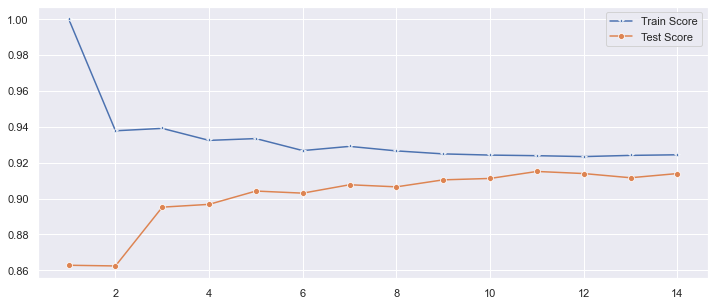

In [27]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [28]:
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9150759641604986

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
pl = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

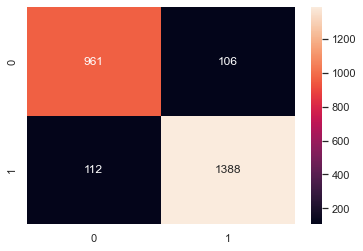

In [30]:
sns.heatmap(pl, annot=True, fmt='g')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1067
           1       0.93      0.93      0.93      1500

    accuracy                           0.92      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.92      0.92      0.92      2567



In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print(auc)

0.9556351140268666


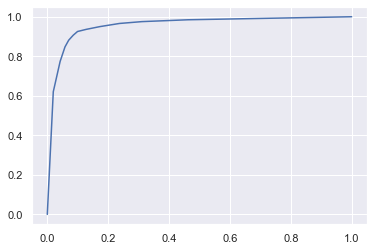

In [33]:
plt.plot(fpr, tpr)

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [35]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9179427235534774
Best Parameters: {'n_neighbors': 39}
